# 시가총액 데이터셋(marcap) 튜토리얼 - 섹터분석

<img src="https://i.imgur.com/b9t5FAA.png?1" width="60%">

* 한국거래소(KRX)에서 일자별 시가총액 순위 데이터
* 1995-05-02 ~ 2020-12-31 (26년간), 1천만건 이상

#### 2018 - 2021 [FinanceData.KR]()

## 시가총액 데이터셋(marcap) 가져오기
다음과 같이 단 한 줄의 명령으로 데이터를 가져올 수 있습니다.

In [ ]:
!git clone "https://github.com/FinanceData/marcap.git" marcap

In [2]:
from marcap import marcap_data

df_marcap = marcap_data('1995-05-02', '2021-01-15')
df_marcap

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
1995-05-02,015760,한국전력공사,KOSPI,NaN,27400,2,-400,-1.44,27600,27800,27400,118190,3255694000,16872679291000,615791215,STK,1
1995-05-02,005930,삼성전자,KOSPI,NaN,119500,2,-1000,-0.83,121000,121000,118500,139560,16676735000,6497053077500,54368645,STK,2
1995-05-02,005490,포항종합제철,KOSPI,NaN,65500,2,-300,-0.46,65800,66200,65400,65970,4334472000,6150568555000,93901810,STK,3
1995-05-02,000200,대우중공업,KOSPI,NaN,9800,1,300,3.16,9500,9840,9500,288380,2805133500,3500638978200,357208059,STK,4
1995-05-02,002610,엘지전자,KOSPI,NaN,31700,2,-300,-0.94,32000,32000,31700,171460,5452050000,2521027012200,79527666,STK,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,267810,앙츠,KONEX,일반기업부,1550,2,-250,-13.89,1550,1600,1550,1504,2331610,2397850000,1547000,KNX,2525
2021-01-15,225850,미애부,KONEX,일반기업부,670,3,0,0.00,670,670,670,50,33500,2232663110,3332333,KNX,2526
2021-01-15,224020,에스케이씨에스,KONEX,일반기업부,650,1,70,12.07,650,650,650,1,650,1998750000,3075000,KNX,2528


In [3]:
len(df_marcap)

11099879

## 환경 설정 - matplotlib 한글 (구글 Colab)

구글 Colab (혹은 우분투 리눅스)의 경우 별도의 한글 폰트 설치가 필요합니다. matplotlib에서 모든 FFT(True Type Font)를 가져다 사용할 수 있습니다.

여기서는 명령라인에서 폰트를 가져다 설치합니다.

matplotlib 전역 환경을 파라미터들을 설정해 줍니다. 차트 이미지의 크기, 폰트, 라인 속성 등을 지정할 수 있습니다.

한글 폰트 설치

아래 셀을 실행하고, 런타임 재시작 (메뉴의 "런타임 / 런타임 다시 시작...") 후
다시 한번 아래 셀을 실행합니다.

'한글 테스트' 가 표시되면 성공한 것입니다.

Text(0.5, 1.0, '한글 테스트')

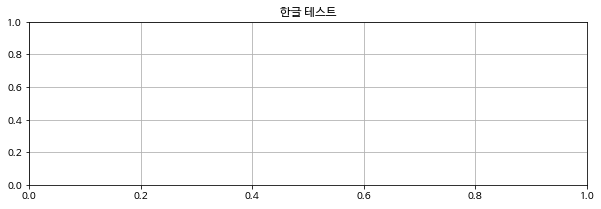

In [4]:
# 한글 폰트 설치와 폰트 캐시 재설정
!apt-get install -y -qq fonts-nanum
!rm -rf ~/.cache/matplotlib/*

# matplotlib 설정
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'NanumBarunGothic'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (10,3)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

plt.title('한글 테스트')

## 환경 설정 - 판다스 출력 자리수

숫자가 커서 과학적 표기법(10의 승수로 표현)으로 표시되면 오히려 읽기 좋지 않은 경우가 있습니다.

pandas에서 수치값을 출력할 때 과학적 표기법을 사용하지 않고, 소수점 이하 몇 자리 출력할 것인지를 정해줍니다.

In [5]:
import pandas as pd
pd.options.display.float_format = '{:.1f}'.format

## 섹터 분석

[FinanceDataReader](https://financedata.github.io/FinanceDataReader/)를 사용하면 전체종목 코드와 섹터 데이터를 손쉽게 가져올 수 있습니다.


[FinanceDataReader](https://financedata.github.io/FinanceDataReader/)는 다음과 같이 설치합니다.

In [6]:
!pip install -q finance-datareader

다음과 같이 간편하게 전체종목 코드와 섹터 데이터를 가져올 수 있습니다.
전체종목 목록을 "종목마스터"(df_master)라고 부르겠습니다.

In [7]:
import FinanceDataReader as fdr

df_master = fdr.StockListing('KRX')
df_master.head(10)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN
9,253160,KOSPI,ARIRANG 200선물인버스2X,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [8]:
len(df_master)

6676

ETF 혹은 우선주에는 Sector 값이 지정되어 있지 않습니다. 따라서 Sector 가 지정된(즉, NaN이 아닌) 종목만 추출합니다.

In [9]:
df_master = df_master.dropna(subset=['Sector'])
df_master

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
6669,189980,KOSDAQ,흥국에프엔비,비알코올음료 및 얼음 제조업,"과일음료(에이드베이스, 스무디, 착즙쥬스 등)",2015-08-07,12월,"박철범, 오길영",http://www.hyungkuk.com,서울특별시
6670,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시
6673,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
6674,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호, 염두성 (각자대표)",http://www.heerim.com,서울특별시


## 전체종목과 시가총액 데이터 병합
다음 두 데이터를 종목코드를 기준으로 병합합니다.

* 종목마스터(df_master): 종목코드(Symbol), 섹터(Sector)
* 시가총액 데이터(df_marcap): 종목코드(Code), 종목명(Name), 시가총액(Marcap)


시가총액 데이터(df_marcap)에서 종목코드(Code), 종목명(Name), 시가총액(Marcap) 데이터만 사용하고, 
이후 날짜를 사용하기 위해 인덱스를 풀어(reset_index)줍니다. 

In [10]:
df_marcap[['Code', 'Name', 'Marcap']].reset_index()

,Date,Code,Name,Marcap
0,1995-05-02,015760,한국전력공사,16872679291000
1,1995-05-02,005930,삼성전자,6497053077500
2,1995-05-02,005490,포항종합제철,6150568555000
3,1995-05-02,000200,대우중공업,3500638978200
4,1995-05-02,002610,엘지전자,2521027012200
...,...,...,...,...
11099874,2021-01-15,267810,앙츠,2397850000
11099875,2021-01-15,225850,미애부,2232663110
11099876,2021-01-15,224020,에스케이씨에스,1998750000
11099877,2021-01-15,179720,옐로페이,1826565000


"종목마스터"(df_master)에서 종목코드(Symbol)와 섹터(Sector) 데이터만 활용합니다.

In [11]:
df_master[['Symbol', 'Sector']]

,Symbol,Sector
0,060310,특수 목적용 기계 제조업
1,095570,산업용 기계 및 장비 임대업
2,006840,기타 금융업
3,054620,기타 금융업
4,265520,특수 목적용 기계 제조업
...,...,...
6669,189980,비알코올음료 및 얼음 제조업
6670,000540,보험업
6673,003280,해상 운송업
6674,037440,"건축기술, 엔지니어링 및 관련 기술 서비스업"


종목코드를 기준으로 시가총액 데이터(df_marcap)와 종목마스터(df_master)를 병합 합니다. 개별 종목에 Sector를 지정하기 위함입니다. 

In [12]:
df = pd.merge(df_marcap[['Code', 'Name', 'Marcap']].reset_index(), df_master[['Symbol', 'Sector']], left_on='Code', right_on="Symbol")
df

,Date,Code,Name,Marcap,Symbol,Sector
0,1995-05-02,015760,한국전력공사,16872679291000,015760,전기업
1,1995-05-03,015760,한국전력공사,17857945235000,015760,전기업
2,1995-05-04,015760,한국전력공사,18473736450000,015760,전기업
3,1995-05-06,015760,한국전력공사,18473736450000,015760,전기업
4,1995-05-08,015760,한국전력공사,18042682599500,015760,전기업
...,...,...,...,...,...,...
8049472,2021-01-11,257990,나우코스,30518241000,257990,기타 화학제품 제조업
8049473,2021-01-12,257990,나우코스,30518241000,257990,기타 화학제품 제조업
8049474,2021-01-13,257990,나우코스,32083279000,257990,기타 화학제품 제조업
8049475,2021-01-14,257990,나우코스,32474538500,257990,기타 화학제품 제조업


피벗하여 날짜별(로우), 섹터(컬럼) 시가총액 합계를 구합니다.

In [13]:
marcap_sector = pd.pivot_table(df, index='Date', columns='Sector', values='Marcap', aggfunc='sum')
marcap_sector

Sector,1차 비철금속 제조업,1차 철강 제조업,가구 제조업,가전제품 및 정보통신장비 소매업,가정용 기기 제조업,"가죽, 가방 및 유사제품 제조업",개인 및 가정용품 임대업,건물 건설업,건물설비 설치 공사업,"건축기술, 엔지니어링 및 관련 기술 서비스업","건축자재, 철물 및 난방장치 도매업","경비, 경호 및 탐정업",고무제품 제조업,"곡물가공품, 전분 및 전분제품 제조업","골판지, 종이 상자 및 종이용기 제조업","과실, 채소 가공 및 저장 처리업",광고업,교육지원 서비스업,"구조용 금속제품, 탱크 및 증기발생기 제조업",귀금속 및 장신용품 제조업,그외 기타 개인 서비스업,그외 기타 운송장비 제조업,"그외 기타 전문, 과학 및 기술 서비스업",그외 기타 제품 제조업,금속 주조업,금융 지원 서비스업,기계장비 및 관련 물품 도매업,기록매체 복제업,기반조성 및 시설물 축조관련 전문공사업,기초 의약물질 및 생물학적 제제 제조업,기초 화학물질 제조업,기타 과학기술 서비스업,기타 교육기관,기타 금속 가공제품 제조업,기타 금융업,기타 비금속 광물제품 제조업,기타 비금속광물 광업,기타 사업지원 서비스업,기타 상품 전문 소매업,기타 생활용품 소매업,...,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",자연과학 및 공학 연구개발업,작물 재배업,재 보험업,전구 및 조명장치 제조업,전기 및 통신 공사업,전기 통신업,전기업,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",전문디자인업,전자부품 제조업,절연선 및 케이블 제조업,제재 및 목재 가공업,종합 소매업,"증기, 냉·온수 및 공기조절 공급업",직물직조 및 직물제품 제조업,창작 및 예술관련 서비스업,철도장비 제조업,초등 교육기관,"측정, 시험, 항해, 제어 및 기타 정밀기기 제조업; 광학기기 제외",컴퓨터 및 주변장치 제조업,컴퓨터 및 통신장비 수리업,"컴퓨터 프로그래밍, 시스템 통합 및 관리업",텔레비전 방송업,토목 건설업,통신 및 방송 장비 제조업,특수 목적용 기계 제조업,"펄프, 종이 및 판지 제조업",편조원단 제조업,편조의복 제조업,폐기물 처리업,플라스틱제품 제조업,합성고무 및 플라스틱 물질 제조업,항공 여객 운송업,"항공기,우주선 및 부품 제조업",해상 운송업,"해체, 선별 및 원료 재생업",화학섬유 제조업,환경 정화 및 복원업,회사 본부 및 경영 컨설팅 서비스업
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1995-05-02,538457200400.0,8733876609000.0,27809341200.0,nan,72768000000.0,112482360000.0,nan,795720984980.0,nan,nan,37332000000.0,nan,81028039000.0,256087307600.0,222367915100.0,nan,nan,nan,nan,nan,nan,24826762500.0,nan,20000000000.0,nan,3816827496900.0,212011660000.0,nan,nan,34320000000.0,2660620843520.0,nan,nan,76878627900.0,5616139717300.0,73005600000.0,44200000000.0,86962020600.0,186066360000.0,nan,...,nan,nan,nan,265436691000.0,55800000000.0,nan,2459760000000.0,16906039291000.0,385529141600.0,nan,827288880300.0,448565689480.0,nan,844308496800.0,nan,208190000000.0,nan,nan,nan,nan,nan,nan,33907300000.0,nan,2753966402900.0,6602068663500.0,290712601160.0,596567517100.0,31652776000.0,nan,nan,280169422300.0,nan,1304982016000.0,292600000000.0,154944000000.0,nan,156704000000.0,nan,1084410432000.0
1995-05-03,548088080400.0,9029561434000.0,28066835100.0,nan,72768000000.0,112434428000.0,nan,807974478500.0,nan,nan,36720000000.0,nan,79090637210.0,253653087600.0,222089915100.0,nan,nan,nan,nan,nan,nan,24495739000.0,nan,20000000000.0,nan,3875214963520.0,213992449900.0,nan,nan,34720000000.0,2616348368900.0,nan,nan,77224692600.0,5664156862600.0,73516000000.0,43000000000.0,89828900400.0,182418000000.0,nan,...,nan,nan,nan,251824553000.0,56000000000.0,nan,2531780000000.0,17891545235000.0,385044391000.0,nan,834316191100.0,448932622200.0,nan,763232549400.0,nan,206200000000.0,nan,nan,nan,nan,nan,nan,33715800000.0,nan,2854266883700.0,6817889088100.0,290461678180.0,593566254800.0,31559679600.0,nan,nan,282880907200.0,nan,1355173632000.0,299600000000.0,143640000000.0,nan,156704000000.0,nan,1106026256000.0
1995-05-04,674058178000.0,9056029296950.0,28066835100.0,nan,71232000000.0,110687845600.0,nan,801862120800.0,nan,nan,36720000000.0,nan,80475569200.0,257347396000.0,221454203000.0,nan,nan,nan,nan,nan,nan,25323297750.0,nan,19840000000.0,nan,3871538796900.0,219601846500.0,nan,nan,33840000000.0,2538501941500.0,nan,nan,76006498500.0,5704193285100.0,62560000000.0,41200000000.0,88873273800.0,186066360000.0,nan,...,nan,nan,nan,248421518500.0,53000000000.0,nan,2548400000000.0,18507336450000.0,391003393400.0,nan,831306158500.0,445654401000.0,nan,779684132100.0,nan,205662000000.0,nan,nan,nan,nan,nan,nan,33586000000.0,nan,2826483134400.0,6762600165300.0,287231075800.0,577031844900.0,31280390400.0,nan,nan,289443761700.0,nan,1345135308800.0,295400000000.0,147240000000.0,nan,160688000000.0,nan,1098946536000.0
1995-05-06,673839138000.0,9080165860330.0,28066835100.0,nan,71232000000.0,109907088800.0,nan,792820808140.0,nan,nan,36108000000.0,nan,80743363200.0,263591800000.0,218696763500.0,nan,nan,nan,nan,nan,nan,24826762500.0,nan,19520000000.0,nan,3762327680970.0,220985669900.0,nan,nan,33280000000.0,2500962017000.0,nan,nan,78636822000.0,564428764

In [14]:
marcap_sector.columns

Index(['1차 비철금속 제조업', '1차 철강 제조업', '가구 제조업', '가전제품 및 정보통신장비 소매업', '가정용 기기 제조업',
       '가죽, 가방 및 유사제품 제조업', '개인 및 가정용품 임대업', '건물 건설업', '건물설비 설치 공사업',
       '건축기술, 엔지니어링 및 관련 기술 서비스업',
       ...
       '폐기물 처리업', '플라스틱제품 제조업', '합성고무 및 플라스틱 물질 제조업', '항공 여객 운송업',
       '항공기,우주선 및 부품 제조업', '해상 운송업', '해체, 선별 및 원료 재생업', '화학섬유 제조업',
       '환경 정화 및 복원업', '회사 본부 및 경영 컨설팅 서비스업'],
      dtype='object', name='Sector', length=158)

In [15]:
marcap_sector.loc['2021-01-15'] # 특정한 날짜의 섹터별 시가총액

Sector
1차 비철금속 제조업           11606303260115.0
1차 철강 제조업             38877432883281.0
가구 제조업                 2929623905955.0
가전제품 및 정보통신장비 소매업       933350393600.0
가정용 기기 제조업             2114003860210.0
                            ...       
해상 운송업                 8432956601310.0
해체, 선별 및 원료 재생업          94611857250.0
화학섬유 제조업               5228547197060.0
환경 정화 및 복원업              74940593370.0
회사 본부 및 경영 컨설팅 서비스업    5625385984290.0
Name: 2021-01-15 00:00:00, Length: 158, dtype: float64

특정한 날짜의 섹터별 시가총액을 소트하여 TOP 10을 구합니다

In [16]:
pd.DataFrame(marcap_sector.loc['2021-01-15'].sort_values(ascending=False)).head(10)

,2021-01-15
Sector,
통신 및 방송 장비 제조업,564865450994723.0
기타 금융업,152672668477230.0
기초 의약물질 및 생물학적 제제 제조업,116760743618390.0
기초 화학물질 제조업,116484981913984.0
반도체 제조업,108813142062647.0
"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",93168498701100.0
자동차용 엔진 및 자동차 제조업,80284670752260.0
기타 화학제품 제조업,74091361120535.0
의약품 제조업,69731657430690.0


In [17]:
cols = pd.DataFrame(marcap_sector.loc['2021-01-15'].sort_values(ascending=False)).head(10).index
cols

Index(['통신 및 방송 장비 제조업', '기타 금융업', '기초 의약물질 및 생물학적 제제 제조업', '기초 화학물질 제조업',
       '반도체 제조업', '자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업', '자동차용 엔진 및 자동차 제조업',
       '기타 화학제품 제조업', '의약품 제조업', '소프트웨어 개발 및 공급업'],
      dtype='object', name='Sector')

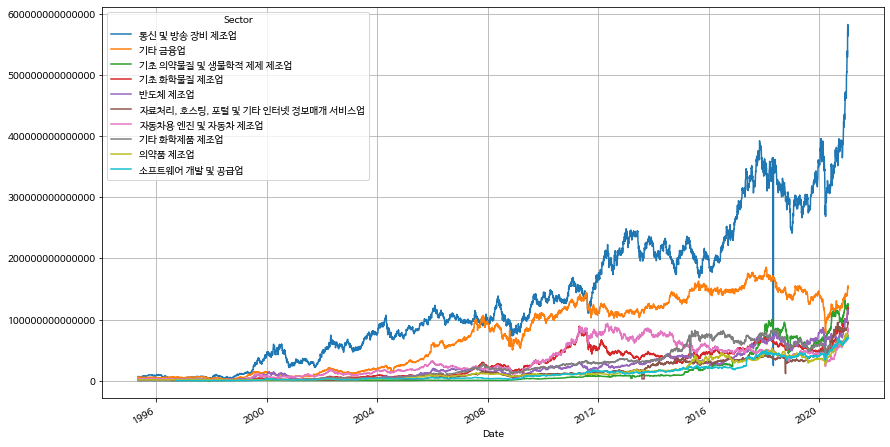

In [18]:
marcap_sector[cols].plot(figsize=(14,8))

펜데믹을 중심으로 2020년 이후 TOP10 섹터를 살펴봅니다.

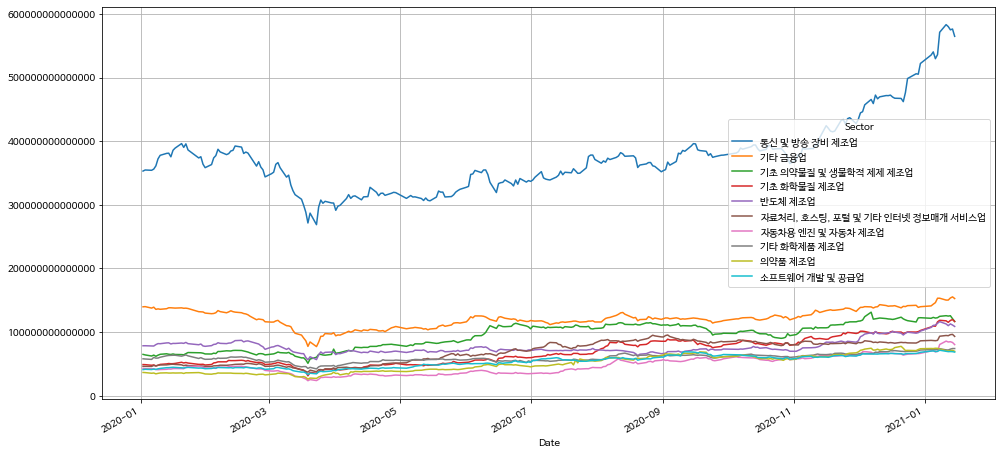

In [19]:
marcap_sector.loc['2020':, cols].plot(figsize=(16,8))

'통신 및 방송 장비 제조업' 섹터의 시가총액이 다른 섹터에 비해 압도적으로 크고 또 가파르게 성장하는 것을 확인할 수 있습니다.

## 섹터별 종목수 
TOP 10을 산출합니다.

In [20]:
marcap_sector_count = pd.pivot_table(df, index='Date', columns='Sector', values='Marcap', aggfunc='count')
marcap_sector_count[cols]

Sector,통신 및 방송 장비 제조업,기타 금융업,기초 의약물질 및 생물학적 제제 제조업,기초 화학물질 제조업,반도체 제조업,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",자동차용 엔진 및 자동차 제조업,기타 화학제품 제조업,의약품 제조업,소프트웨어 개발 및 공급업
Date,,,,,,,,,,
1995-05-02,4.0,30.0,1.0,15.0,2.0,nan,3.0,13.0,26.0,nan
1995-05-03,4.0,30.0,1.0,15.0,2.0,nan,3.0,13.0,26.0,nan
1995-05-04,4.0,31.0,1.0,15.0,2.0,nan,3.0,13.0,26.0,nan
1995-05-06,4.0,29.0,1.0,14.0,2.0,nan,3.0,13.0,25.0,nan
1995-05-08,4.0,29.0,1.0,15.0,2.0,nan,3.0,13.0,25.0,nan
...,...,...,...,...,...,...,...,...,...,...
2021-01-11,66.0,91.0,36.0,43.0,53.0,18.0,4.0,85.0,93.0,126.0
2021-01-12,67.0,91.0,36.0,43.0,52.0,18.0,4.0,84.0,93.0,128.0
2021-01-13,67.0,91.0,36.0,43.0,51.0,18.0,4.0,85.0,93.0,128.0


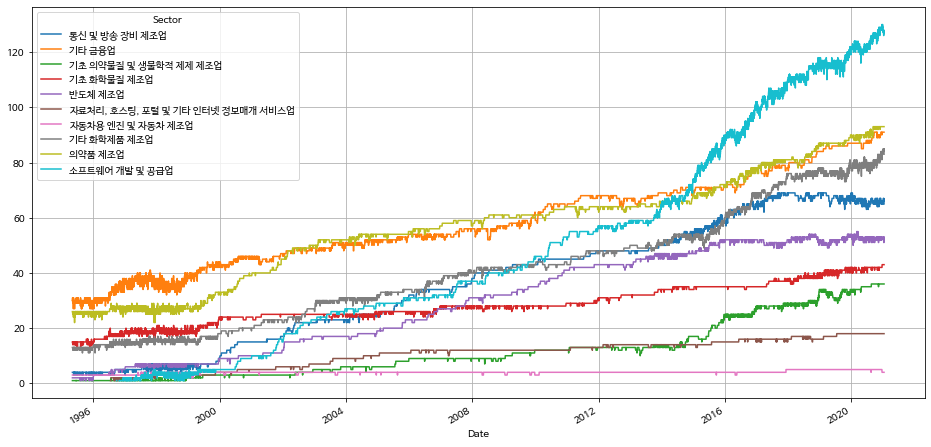

In [21]:
marcap_sector_count[cols].plot(figsize=(16,8))

In [22]:
marcap_sector_count.loc['2021-01-15']

Sector
1차 비철금속 제조업           18.0
1차 철강 제조업             54.0
가구 제조업                 8.0
가전제품 및 정보통신장비 소매업      2.0
가정용 기기 제조업             9.0
                      ... 
해상 운송업                 4.0
해체, 선별 및 원료 재생업        1.0
화학섬유 제조업              10.0
환경 정화 및 복원업            1.0
회사 본부 및 경영 컨설팅 서비스업   11.0
Name: 2021-01-15 00:00:00, Length: 158, dtype: float64

In [23]:
count_top10 = marcap_sector_count.loc['2021-01-15'].sort_values(ascending=False)[:10]
count_top10

Sector
특수 목적용 기계 제조업    135.0
소프트웨어 개발 및 공급업   127.0
전자부품 제조업         115.0
의약품 제조업           93.0
기타 금융업            91.0
자동차 신품 부품 제조업     90.0
기타 화학제품 제조업       83.0
금융 지원 서비스업        67.0
통신 및 방송 장비 제조업    65.0
1차 철강 제조업         54.0
Name: 2021-01-15 00:00:00, dtype: float64

특정 날짜(2021-01-15)기준으로 가장 많은 종목은 '특수 목적용 기계 제조업', '소프트웨어 개발 및 공급업', '전자부품 제조업' 순이네요.

섹터별 종목수 TOP 10을 파이차트로 표현해 봅니다. 



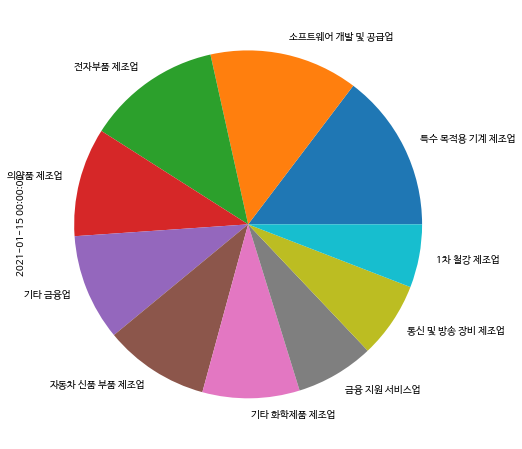

In [24]:
count_top10.plot.pie(figsize=(8, 8))

## 결론
시가총액(marcap) 데이터셋은 26년간 개별 종목의 가격 등 다양한 데이터를 포함하고 있습니다. 

특정 분야의 종목의 시총을 일자별로 합산하면 특정 영역의 혹은 특정 산업의 트렌드를 분석하는데도 요긴하게 사용할 수 있으며, 산업의 규모나 트렌드 분석하는데도 사용할 수 있습니다.

#### 2018 - 2021 [FinanceData.KR]()